In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [34]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
#businesses.isnull().sum()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [33]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()
#inspections.isnull().sum()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [36]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()
violations.isnull().sum()

business_id         0
date                0
ViolationTypeID     0
risk_category      10
description        10
dtype: int64

In [140]:
# 1 Combine the three dataframes into one data frame called restaurant_scores

restaurant_scores = result = businesses.append([inspections, violations])
restaurant_scores
#restaurant_scores.isnull().sum()
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

,Score,TaxCode,ViolationTypeID,address,application_date,business_certificate,business_id,city,date,description,...,name,owner_address,owner_city,owner_name,owner_state,owner_zip,phone_number,postal_code,risk_category,type
0,NaN,H24,NaN,033 Belden Pl,NaN,779059.0,17,San Francisco,NaN,NaN,...,Tiramisu Kitchen,33 Belden St,San Francisco,Tiramisu LLC,CA,94104,NaN,94104,NaN,NaN
1,NaN,H24,NaN,"1200 Van Ness Ave, 3rd Floor",NaN,NaN,17,San Francisco,NaN,NaN,...,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,24 Hour Fitness Inc,CA,94109,NaN,94109,NaN,NaN
2,NaN,H24,NaN,"500 California St, 2nd Floor",NaN,352312.0,17,San Francisco,NaN,NaN,...,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,OMNI San Francisco Hotel Corp,CA,94104,NaN,94104,NaN,NaN
3,NaN,H24,NaN,2801 Leavenworth St,NaN,346882.0,17,San Francisco,NaN,NaN,...,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,Norman Antiforda,CA,94133,NaN,94133,NaN,NaN
4,NaN,H24,NaN,3202 FOLSOM St,10/10/2001,340024.0,17,S.F.,NaN,NaN,...,CHARLIE'S DELI CAFE,1150 SANCHEZ,S.F.,"HARB, CHARLES AND KRISTIN",CA,94114,NaN,94110,NaN,NaN
5,NaN,H24,NaN,747 IRVING St,NaN,318022.0,17,SAN FRANCISCO,NaN,NaN,...,ART'S CAFE,1567 FUNSTON AVE,SAN FRANCISCO,YOON HAE RYONG,CA,94122,NaN,94122,NaN,NaN
6,NaN,H24,NaN,1815 Market St.,NaN,NaN,17,SF,NaN,NaN,...,SUSHI ZONE,246 Ney Vst,SF,"AOYAMA, KIMIAKI",CA,94112,+14155621114,94103,NaN,NaN
7,NaN,H24,NaN,2180 POST St,NaN,417778.0,17,S.F.,NaN,NaN,...,RHODA GOLDMAN PLAZA,2180 POST St,S.F.,RHODA GOLDMAN PLAZA,CA,94115,+14155345060,94115,NaN,NaN
8,NaN,H24,NaN,1799 Church St,NaN,347603.0,17,SF,NaN,NaN,...,CAFE X + O,1799 CHURCH,SF,"BOUSIAKIS, ADAM",CA,94131,+14155823535,94131,NaN,NaN
9,NaN,H24,NaN,91 Drumm St,NaN,954377.0,17,San Francisco,NaN,NaN,...,Oasis Grill,91 Drumm St,San Francisco,Mohammad Zughaiyir,CA,94111,NaN,94111,NaN,NaN


In [143]:
# 2 Which ten business have had the most inspections?
inspections_value_counts = restaurant_scores.name.value_counts()

top_ten_inspections = inspections_value_counts.head(10)

top_ten_inspections



Peet's Coffee & Tea           18
Starbucks Coffee              15
San Francisco Soup Company     9
Specialty's Cafe & Bakery      9
STARBUCKS                      9
AT&T PARK - Food Cart          8
Subway Sandwiches              8
Bon Appetit Management Co      7
Whole Foods Market             7
Starbucks                      7
Name: name, dtype: int64

In [145]:
# 3 Group and count the inspections by type

restaurant_scores.risk_category.value_counts()

Low Risk         20743
Moderate Risk    13452
High Risk         5515
Name: risk_category, dtype: int64

In [173]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap


In [170]:
# 5 Which zip code contains the most high risk violations?

restaurant_scores.city.max()

'sf'

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [175]:
# 7 Examining the descriptions, what is the most common violation?

restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3395
Name: description, dtype: int64

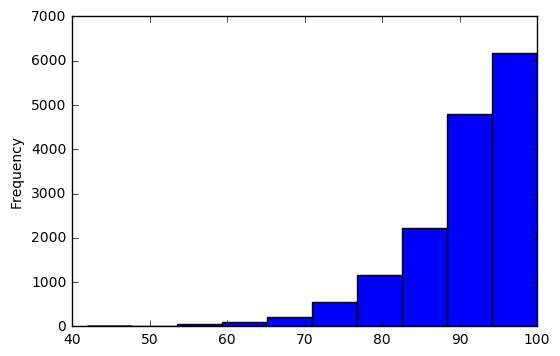

In [178]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.plot(kind = 'hist', bins = 10)

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [72]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [75]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns={'lawenforcementagency':'agency','raceethnicity':'race'},inplace=True)
killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')

In [76]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [110]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value = 'Unknown', inplace = True)

In [111]:
# 4. How many killings were there so far in 2015?
killings.count()

Unnamed: 0       467
name             467
age              467
gender           467
race             467
month            467
day              467
year             467
streetaddress    467
city             467
state            467
agency           467
cause            467
armed            467
county_income    467
dtype: int64

In [112]:
# 5. Of all killings, how many were male and how many female?

killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [246]:
# 6. How many killings were of unarmed people? 

#Answer: 102

killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [264]:
# 7. What percentage of all killings were unarmed?

'''total_killings = killings['name'].value_counts()
is_unarmed = killings['armed'] == "No"
unarmed_reportings = killings[is_unarmed]
unarmed_counts = unarmed_reportings['armed'].value_counts()
unarmed_counts 
is_unarmed'''

'total_killings = killings[\'name\'].value_counts()\nis_unarmed = killings[\'armed\'] == "No"\nunarmed_reportings = killings[is_unarmed]\nunarmed_counts = unarmed_reportings[\'armed\'].value_counts()\nunarmed_counts \nis_unarmed'

In [114]:
# 8. What are the 5 states with the most killings?

killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [115]:
# 9. Show a value counts of deaths for each race

killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

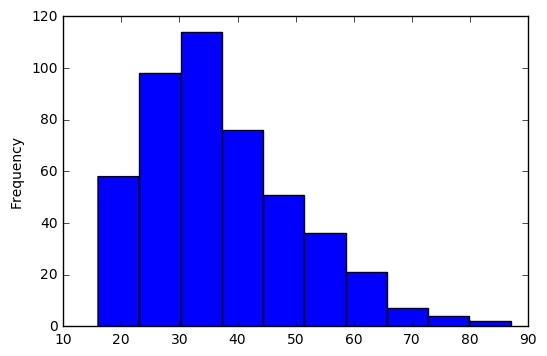

In [218]:
# 10. Display a histogram of ages of all killings

killings.age.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120f67450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12193c850>]], dtype=object)

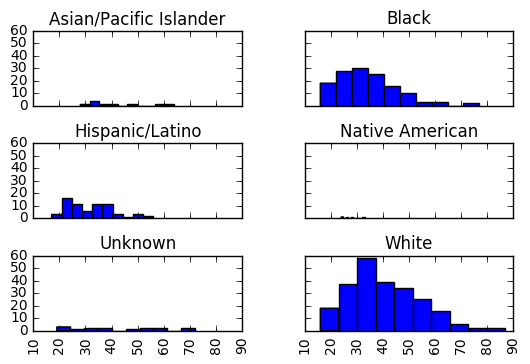

In [117]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [119]:
# 12. What is the average age of death by race?

killings.groupby('race').age.mean().order(ascending=False)

/Users/laurenwashington/anaconda/envs/elledubby/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


race
Unknown                   43.533333
Asian/Pacific Islander    40.800000
White                     40.466102
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Name: age, dtype: float64

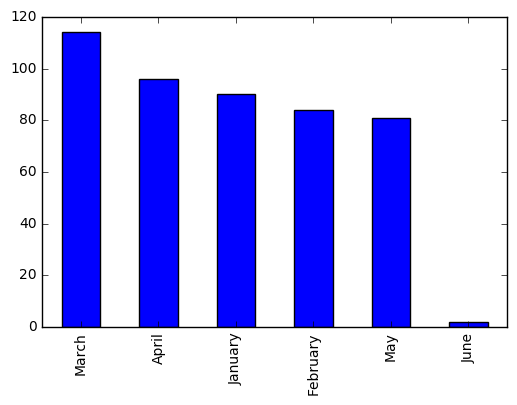

In [130]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [179]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()
#majors.columns

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [164]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']  
del majors['Major_code']

Index([u'Unnamed: 0', u'Major', u'Major_category', u'Total', u'Employed',
       u'Unemployed', u'Unemployment_rate', u'Median', u'P25th', u'P75th'],
      dtype='object')

In [165]:
# 2. Show the count of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [268]:
# 3. What are the top 10 highest paying majors?

top_paying_majors = majors[['Major', 'P75th']]
top_paying_majors_sorted = top_paying_majors.sort_values(by = 'P75th', ascending= False)
top_paying_majors_sorted.head(10)

,Major,P75th
59,PETROLEUM ENGINEERING,210000.0
97,MATHEMATICS AND COMPUTER SCIENCE,136000.0
58,NUCLEAR ENGINEERING,128000.0
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,125000.0
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,125000.0
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,125000.0
56,MINING AND MINERAL ENGINEERING,124000.0
55,METALLURGICAL ENGINEERING,123000.0
45,CHEMICAL ENGINEERING,120000.0
48,ELECTRICAL ENGINEERING,116000.0


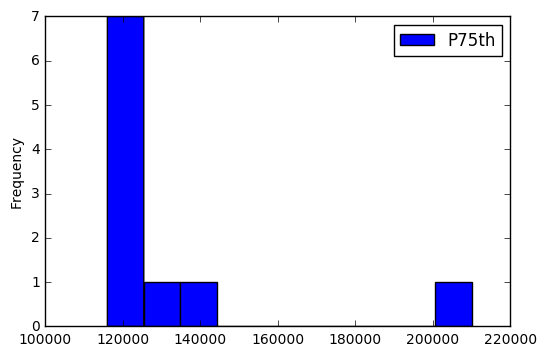

In [271]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

top_paying_majors_sorted.head(10).plot(kind = 'hist')

In [276]:
# 5. What is the average median salary for each major category?

average_median_salaries = majors.groupby('Major').Median.apply(lambda x: x.mean())
average_median_salaries

#or 

avg_mdn_sal = majors.groupby('Major').Median.mean()
avg_mdn_sal

Major
ACCOUNTING                                       65000
ACTUARIAL SCIENCE                                72000
ADVERTISING AND PUBLIC RELATIONS                 50000
AEROSPACE ENGINEERING                            80000
AGRICULTURAL ECONOMICS                           63000
AGRICULTURE PRODUCTION AND MANAGEMENT            54000
ANIMAL SCIENCES                                  46000
ANTHROPOLOGY AND ARCHEOLOGY                      43000
APPLIED MATHEMATICS                              70000
ARCHITECTURAL ENGINEERING                        78000
ARCHITECTURE                                     63000
AREA ETHNIC AND CIVILIZATION STUDIES             46000
ART AND MUSIC EDUCATION                          42600
ART HISTORY AND CRITICISM                        44500
ASTRONOMY AND ASTROPHYSICS                       80000
ATMOSPHERIC SCIENCES AND METEOROLOGY             60000
BIOCHEMICAL SCIENCES                             53000
BIOLOGICAL ENGINEERING                           62000
BIOL

In [220]:
# 6. Show only the top 5 paying major categories

average_median_salaries.nlargest(5)


Major
PETROLEUM ENGINEERING                                  125000.0
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION    106000.0
NAVAL ARCHITECTURE AND MARINE ENGINEERING               97000.0
METALLURGICAL ENGINEERING                               96000.0
NUCLEAR ENGINEERING                                     95000.0
Name: Median, dtype: float64

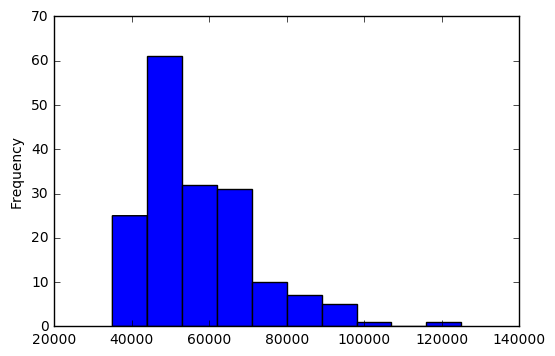

In [217]:
# 7. Plot a histogram of the distribution of median salaries

majors.Median.plot(kind='hist')

In [221]:
# 8. Plot a histogram of the distribution of median salaries by major category


In [239]:
# 9. What are the top 10 most UNemployed majors?
top_unemployed = majors[['Major', 'Unemployed']]
top_unemployed_sorted = top_unemployed.sort_values(by = 'Unemployed', ascending= False)
top_unemployed_sorted.head(10)

,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [240]:
# What are the unemployment rates?

top_unemployment_rate = majors[['Major', 'Unemployed', 'Unemployment_rate']]
top_unemployment_rate_sorted = top_unemployment_rate.sort_values(by = 'Unemployed', ascending= False)
top_unemployment_rate_sorted.head(10)

,Major,Unemployed,Unemployment_rate
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865
158,GENERAL BUSINESS,85626,0.051378
114,PSYCHOLOGY,79066,0.069667
159,ACCOUNTING,75379,0.053415
13,COMMUNICATIONS,54390,0.064360
73,ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
164,MARKETING AND MARKETING RESEARCH,51839,0.055033
132,POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
25,GENERAL EDUCATION,38742,0.043904
78,BIOLOGY,36757,0.059301


In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"